# Predstavitev podatkov

Podatki v CSV datoteki vsebujejo podrobne informacije o prometnih nesrečah in udeležencih v teh nesrečah. Tukaj je opis posameznih stolpcev:

### Osnovni podatki o nesreči
1. **ZaporednaStevilkaPN**: Unikatna številka, ki identificira vsako prometno nesrečo  
2. **KlasifikacijaNesrece**: Klasifikacija nesreče glede na resnost (avtomatično določena glede na najhujšo posledico)  
3. **UpravnaEnotaStoritve**: Upravna enota, kjer se je nesreča zgodila  
4. **DatumPN**: Datum nesreče v formatu dd.mm.llll  
5. **UraPN**: Ura nesreče v formatu hh.mm  

### Lokacijski podatki
6. **VNaselju**: Indikator, ali se je nesreča zgodila v naselju (D) ali izven (N)  
7. **Lokacija**: Lokacija nesreče  
8. **VrstaCesteNaselja**: Vrsta ceste ali naselja, kjer je prišlo do nesreče  
9. **SifraCesteNaselja**: Šifra ceste ali naselja  
10. **TekstCesteNaselja**: Ime ceste ali naselja  
11. **SifraOdsekaUlice**: Šifra odseka ceste ali ulice  
12. **TekstOdsekaUlice**: Ime odseka ceste ali ulice  
13. **StacionazaDogodka**: Točna stacionaža ali hišna številka  
14. **OpisKraja**: Opis prizorišča nesreče  

### Podatki o okoliščinah nesreče
15. **VzrokNesrece**: Glavni vzrok nesreče  
16. **TipNesrece**: Tip nesreče (npr. čelni trk, stranski trk)  
17. **VremenskeOkoliscine**: Vremenske razmere v času nesreče  
18. **StanjePrometa**: Stanje prometa v času nesreče  
19. **StanjeVozisca**: Stanje vozišča v času nesreče  
20. **VrstaVozisca**: Vrsta površine vozišča  
21. **GeoKoordinataX**: X koordinata lokacije (od 2013 v D96/TM, prej Gauß-Krüger)  
22. **GeoKoordinataY**: Y koordinata lokacije (od 2013 v D96/TM, prej Gauß-Krüger)  

### Podatki o udeležencih
23. **ZaporednaStevilkaOsebeVPN**: številka za štetje in ločevanje oseb, udeleženih v prometnih nesrečah
24. **Povzrocitelj**: kot kaj nastopa oseba v prometni nesreči
25. **Starost**: Starost osebe v letih  
26. **Spol**: Spol osebe  
27. **UEStalnegaPrebivalisca**: Upravna enota stalnega prebivališča  
28. **Drzavljanstvo**: Državljanstvo osebe  
29. **PoskodbaUdelezenca**: Stopnja poškodbe udeleženca  
30. **VrstaUdelezenca**: Vloga v prometu (voznik, pešec, kolesar...)  
31. **UporabaVarnostnegaPasu**: Ali je uporabljal varnostni pas/čelado (Da/Ne)  
32. **VozniskiStazVLetih**: vozniški staž osebe za kategorijo, ki jo potrebuje glede na vrsto udeleženca v prometu (LL)
33. **VozniskiStazVMesecih**: vozniški staž osebe za kategorijo, ki jo potrebuje glede na vrsto udeleženca v prometu (MM)
34. **VrednostAlkotesta**: vrednost alkotesta za osebo, če je bil opravljen (n.nn v enoti mg alkohola/liter izdihanega zraka (mg/l))
35. **VrednostStrokovnegaPregleda**: vrednost strokovnega pregleda za osebo, če je bil odrejen in so rezultati že znani (n.nn v enoti g alkohola/kg krvi (g/kg))

## Priprava podatkov

In [25]:
import pandas as pd
import os

directory = './podatki'
data = []
max_zaporedna_stevilka = 0  

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        try:
            frame = pd.read_csv(
                filepath,
                delimiter=';',
                encoding='utf-8',
            )
            frame['ZaporednaStevilkaPN'] += max_zaporedna_stevilka
            max_zaporedna_stevilka = frame['ZaporednaStevilkaPN'].max()  

            data.append(frame)
        except Exception as e:
            print(f"Napaka pri branju {filename}: {str(e)}")
            continue

combined_data = pd.concat(data, ignore_index=True)

combined_data


,ZaporednaStevilkaPN,KlasifikacijaNesrece,UpravnaEnotaStoritve,DatumPN,UraPN,VNaselju,Lokacija,VrstaCesteNaselja,SifraCesteNaselja,TekstCesteNaselja,...,Spol,UEStalnegaPrebivalisca,Drzavljanstvo,PoskodbaUdelezenca,VrstaUdelezenca,UporabaVarnostnegaPasu,VozniskiStazVLetih,VozniskiStazVMesecih,VrednostAlkotesta,VrednostStrokovnegaPregleda
0,1,S HUDO TELESNO POŠKODBO,RAVNE NA KOROŠKEM,04.01.2009,3.45,NE,CESTA,LOKALNA CESTA,99910,PREVALJE-STROJNA-ŠTOPAR,...,MOŠKI,RAVNE NA KOROŠKEM,SLOVENIJA,HUDA TELESNA POŠKODBA,VOZNIK OSEBNEGA AVTOMOBILA,NE,0,10,",77",",00"
1,1,S HUDO TELESNO POŠKODBO,RAVNE NA KOROŠKEM,04.01.2009,3.45,NE,CESTA,LOKALNA CESTA,99910,PREVALJE-STROJNA-ŠTOPAR,...,MOŠKI,RAVNE NA KOROŠKEM,SLOVENIJA,LAŽJA TELESNA POŠKODBA,POTNIK,NE,0,0,",00",",00"
2,1,S HUDO TELESNO POŠKODBO,RAVNE NA KOROŠKEM,04.01.2009,3.45,NE,CESTA,LOKALNA CESTA,99910,PREVALJE-STROJNA-ŠTOPAR,...,MOŠKI,RAVNE NA KOROŠKEM,SLOVENIJA,LAŽJA TELESNA POŠKODBA,POTNIK,NE,0,0,",00",",00"
3,1,S HUDO TELESNO POŠKODBO,RAVNE NA KOROŠKEM,04.01.2009,3.45,NE,CESTA,LOKALNA CESTA,99910,PREVALJE-STROJNA-ŠTOPAR,...,MOŠKI,RAVNE NA KOROŠKEM,SLOVENIJA,LAŽJA TELESNA POŠKODBA,POTNIK,NE,0,0,",00",",00"
4,2,Z MATERIALNO ŠKODO,HRASTNIK,03.01.2009,20.15,NE,CESTA,REGIONALNA CESTA,00221,TROJANE-IZLAKE-ŠMARJETA,...,ŽENSKI,HRASTNIK,SLOVENIJA,BREZ POŠKODBE,VOZNIK OSEBNEGA AVTOMOBILA,DA,6,0,",00",",00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522380,286468,Z MATERIALNO ŠKODO,LJUBLJANA,01.09.2023,20.00,DA,NASELJE,NASELJE Z ULIČNIM SISTEMOM,25001,LJUBLJANA,...,MOŠKI,LJUBLJANA,SLOVENIJA,BREZ POŠKODBE,VOZNIK OSEBNEGA AVTOMOBILA,NE,5,6,",00",",00"
522381,286469,Z MATERIALNO ŠKODO,LJUBLJANA,08.09.2023,13.55,DA,CESTA,REGIONALNA CESTA,00211,KRANJ(LABORE)-LJ(ŠENTVID),...,MOŠKI,NaN,BOSNA IN HERCEGOVINA,BREZ POŠKODBE,VOZNIK AVTOBUSA,DA,4,8,",00",",00"
522382,286470,Z MATERIALNO ŠKODO,CELJE,03.12.2023,10.27,DA,NASELJE,NASELJE Z ULIČNIM SISTEMOM,03011,CELJE,...,MOŠKI,MARIBOR,SLOVENIJA,BREZ POŠKODBE,VOZNIK OSEBNEGA AVTOMOBILA,NEZNANO,45,0,",00",",00"
522383,286470,Z MATERIALNO ŠKODO,CELJE,03.12.2023,10.27,DA,NASELJE,NASELJE Z ULIČNIM SISTEMOM,03011,CELJE,...,MOŠKI,CELJE,SLOVENIJA,BREZ POŠKODBE,VOZNIK OSEBNEGA AVTOMOBILA,NEZNANO,0,0,",00",",00"


## Analiza podtakov

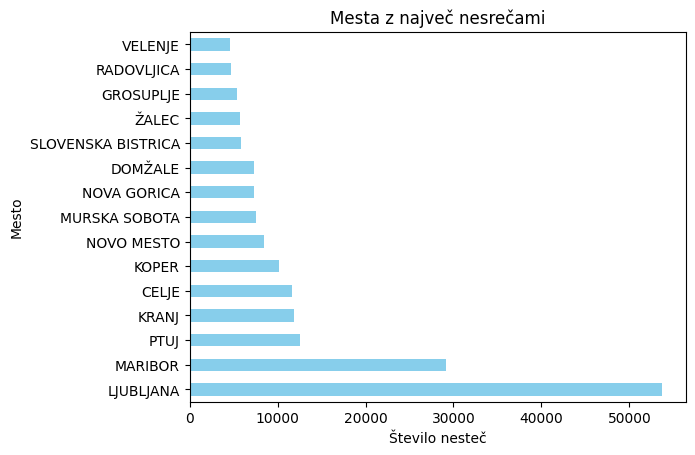

In [35]:
import matplotlib.pyplot as plt

unique_accidents = combined_data.groupby('ZaporednaStevilkaPN').first()

city_counts = unique_accidents['UpravnaEnotaStoritve'].value_counts().nlargest(15) 

city_counts.plot(kind='barh', color='skyblue')

plt.title('Mesta z največ nesrečami')
plt.xlabel('Število nesteč')
plt.ylabel('Mesto')

plt.show()

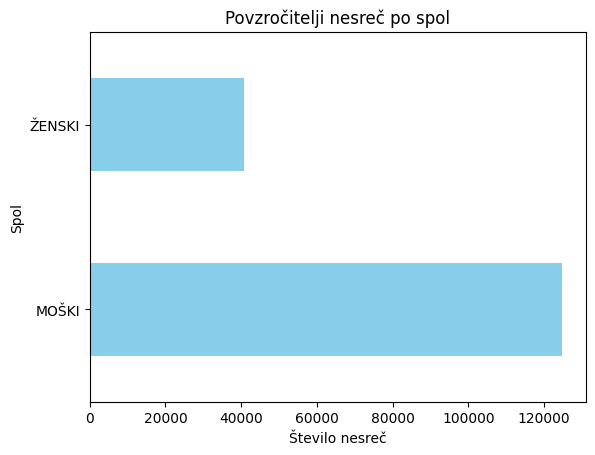

In [ ]:
unique_accidents = combined_data.groupby('ZaporednaStevilkaPN').first()
culprits = unique_accidents[unique_accidents['Povzrocitelj'] == 'POVZROČITELJ']
gender_counts = culprits['Spol'].value_counts().nlargest(2)
gender_counts.plot(kind='barh', color='skyblue')

plt.title('Povzročitelji nesreč po spolu')
plt.xlabel('Število nesreč')
plt.ylabel('Spol')

plt.show()
